In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
matplotlib.rcParams.update({'font.size': 10})
matplotlib.rcParams.update({'figure.figsize': (12,6)})
matplotlib.rcParams["axes.grid"] = True

#### Задание 1
Выберите наборы данных. которые можно интерпретировать, как временные ряды:  
а) зависимость цены на недвижимость в конкретном регионе от времени,  
б) скорость полета самолета при перелете из аэропорта А в аэропорт В,  
в) количество отказов компьютера,  
г) число обращений в поликлинику по району,  
д) координаты автобуса при движении по маршруту,  
е) координаты фигуры нарушителя в файле видеофиксации охранной системы.

#### Ответ:
Все приведённые наборы можно интерпретировать как временные ряды при наличии в данных временных значений (дата или дата+время).

#### Задание 2
Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии
в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.

In [2]:
data = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   DUQ_MW  119068 non-null  float64
dtypes: float64(1)
memory usage: 1.8 MB


In [4]:
min(data.index)

Timestamp('2005-01-01 01:00:00')

In [5]:
max(data.index)

Timestamp('2018-08-03 00:00:00')

In [6]:
data.sort_index(inplace=True)

In [7]:
data.head()

,DUQ_MW
Datetime,
2005-01-01 01:00:00,1364.0
2005-01-01 02:00:00,1273.0
2005-01-01 03:00:00,1218.0
2005-01-01 04:00:00,1170.0
2005-01-01 05:00:00,1166.0


In [8]:
data.tail()

,DUQ_MW
Datetime,
2018-08-02 20:00:00,1966.0
2018-08-02 21:00:00,1944.0
2018-08-02 22:00:00,1901.0
2018-08-02 23:00:00,1789.0
2018-08-03 00:00:00,1656.0


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
DUQ_MW,119068.0,1658.820296,301.74064,1014.0,1444.0,1630.0,1819.0,3054.0


Text(0, 0.5, 'МВт')

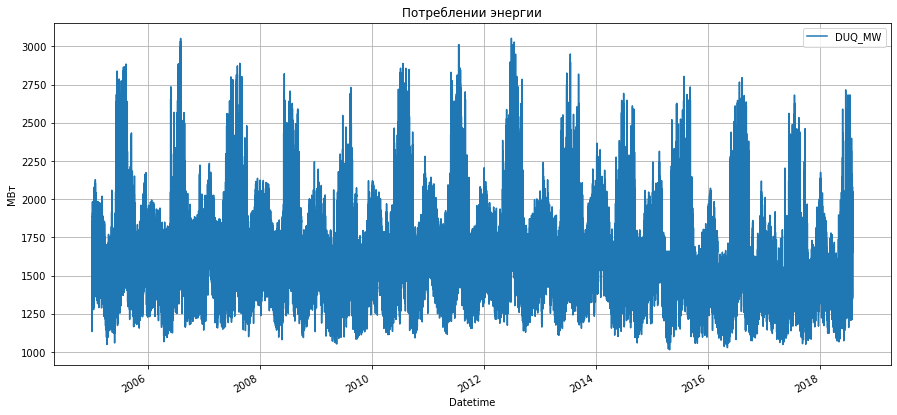

In [11]:
data.plot(style = '-', figsize=(15,7), title = 'Потреблении энергии')
plt.ylabel('МВт')

In [12]:
data.nlargest(5, "DUQ_MW")

,DUQ_MW
Datetime,
2012-06-29 14:00:00,3054.0
2006-08-03 16:00:00,3053.0
2006-08-03 17:00:00,3046.0
2006-08-02 17:00:00,3035.0
2012-07-17 18:00:00,3029.0


Наибольшее потребление энергии зафиксировано 29 июня 2012 года и 8 марта 2006 года

In [13]:
data.nsmallest(5, "DUQ_MW")

,DUQ_MW
Datetime,
2015-04-27 06:00:00,1014.0
2015-04-19 06:00:00,1020.0
2015-04-19 04:00:00,1024.0
2015-04-19 05:00:00,1025.0
2016-05-08 05:00:00,1028.0


Наименьшее потребление энергии зафиксировано в апреле 2015 года

In [14]:
from datetime import datetime
date_from = datetime(2015, 4, 1)
date_to = datetime(2015, 4, 30)
data_201504 = data.query('(index >= @date_from) & (index <= @date_to)')

Text(0, 0.5, 'МВт')

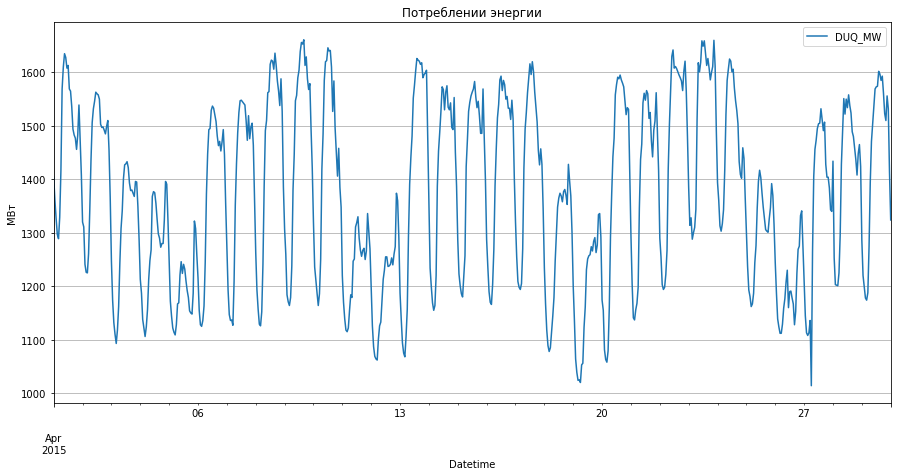

In [15]:
data_201504.plot(style = '-', figsize=(15,7), title = 'Потреблении энергии')
plt.ylabel('МВт')

In [16]:
unic_val = len(data.index.unique())
all_val = data.shape[0]
print(f'Всего значений: {all_val}\nУникальных значений: {unic_val}')

Всего значений: 119068
Уникальных значений: 119064


In [17]:
# Задвоенные значения
count_data = data.index.value_counts()
count_data.head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: Datetime, dtype: int64

In [18]:
date_range = pd.date_range('2005-01-01 01:00:00', '2018-08-03 00:00:00', freq="H").to_pydatetime().tolist()
len(date_range)

119088

In [19]:
# Пропущенные значения
missing_values = [x for x in date_range if x not in data.index]
missing_values

[datetime.datetime(2005, 4, 3, 3, 0),
 datetime.datetime(2005, 10, 30, 2, 0),
 datetime.datetime(2006, 4, 2, 3, 0),
 datetime.datetime(2006, 10, 29, 2, 0),
 datetime.datetime(2007, 3, 11, 3, 0),
 datetime.datetime(2007, 11, 4, 2, 0),
 datetime.datetime(2008, 3, 9, 3, 0),
 datetime.datetime(2008, 11, 2, 2, 0),
 datetime.datetime(2009, 3, 8, 3, 0),
 datetime.datetime(2009, 11, 1, 2, 0),
 datetime.datetime(2010, 3, 14, 3, 0),
 datetime.datetime(2010, 11, 7, 2, 0),
 datetime.datetime(2010, 12, 10, 0, 0),
 datetime.datetime(2011, 3, 13, 3, 0),
 datetime.datetime(2011, 11, 6, 2, 0),
 datetime.datetime(2012, 3, 11, 3, 0),
 datetime.datetime(2012, 11, 4, 2, 0),
 datetime.datetime(2013, 3, 10, 3, 0),
 datetime.datetime(2013, 11, 3, 2, 0),
 datetime.datetime(2014, 3, 9, 3, 0),
 datetime.datetime(2015, 3, 8, 3, 0),
 datetime.datetime(2016, 3, 13, 3, 0),
 datetime.datetime(2017, 3, 12, 3, 0),
 datetime.datetime(2018, 3, 11, 3, 0)]

In [20]:
len(missing_values)

24

Данная выборка - числовой временной ряд цикличного потребления электроэнергии без видимых выбросов.   
Выборка первоначально не отсортирована по времени.   
Содержит 119068 почасовых значений в интервале от '2005-01-01 01:00:00' до '2018-08-03 00:00:00'.   
Имеется 4 дублирующихся значений в начале ноября каждого года с 2014 по 2017 (вероятно связано с переводом часов)   
Имеется 24 пропущенных значений в марте, апреле, октябре, ноябре (вероятно связано с переходом на летнее время и обратно)   
Максимальное значение 3054, минимальное - 1014, среднее - 1658.82.

#### Задание 3
Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.   
Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных,   
месячных и годовых группах для Brent.   
Сделайте вывод о том, как изменилось поведение цены на недельных и месячных графиках по сравнению с дневными.

In [21]:
brent = pd.read_excel('нефть-brent 2010-2019.xlsx', index_col=[0], parse_dates=[0])

In [22]:
brent.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2667 entries, 2019-09-01 to 2010-09-01
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Значение  2667 non-null   float64
dtypes: float64(1)
memory usage: 41.7 KB


In [23]:
min(brent.index)

Timestamp('2010-09-01 00:00:00')

In [24]:
max(brent.index)

Timestamp('2019-09-01 00:00:00')

In [25]:
brent.describe().T

,count,mean,std,min,25%,50%,75%,max
Значение,2667.0,81.533547,26.349469,27.85,56.84,77.71,108.19,126.9


In [26]:
brent[brent['Значение'].isnull()].count()

Значение    0
dtype: int64

In [29]:
brent.sort_index(inplace=True)

In [31]:
brent.head()

,Значение
Дата,
2010-09-01,76.37
2010-09-02,76.89
2010-09-03,76.57
2010-09-04,76.62
2010-09-05,76.63


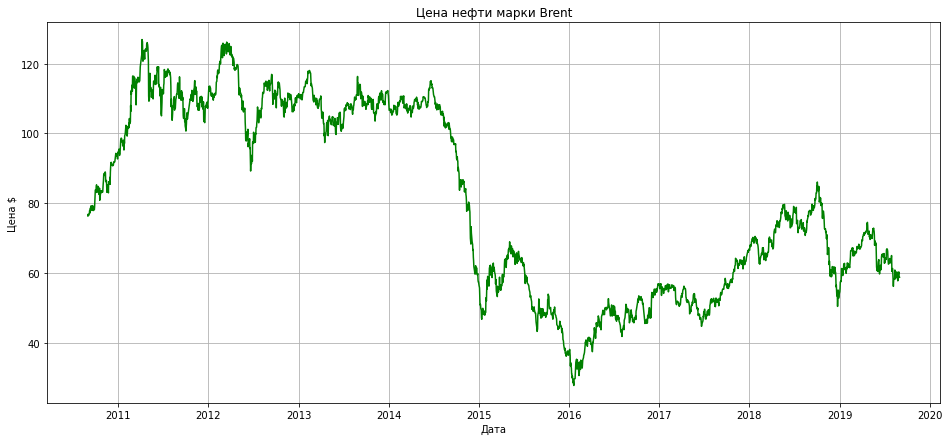

In [32]:
fig, ax = plt.subplots()
ax.plot(brent.index, brent, color="green")
plt.title("Цена нефти марки Brent")
plt.xlabel("Дата")
plt.ylabel("Цена $")
fig.set_figwidth(16)
fig.set_figheight(7)
plt.show()

In [33]:
# Перерасчёт среднего по неделям
brent_week = brent.resample("W").mean()
# Перерасчёт среднего по месяцам
brent_month = brent.resample("M").mean()
# Перерасчёт среднего по годам
brent_year = brent.resample('Y').mean()

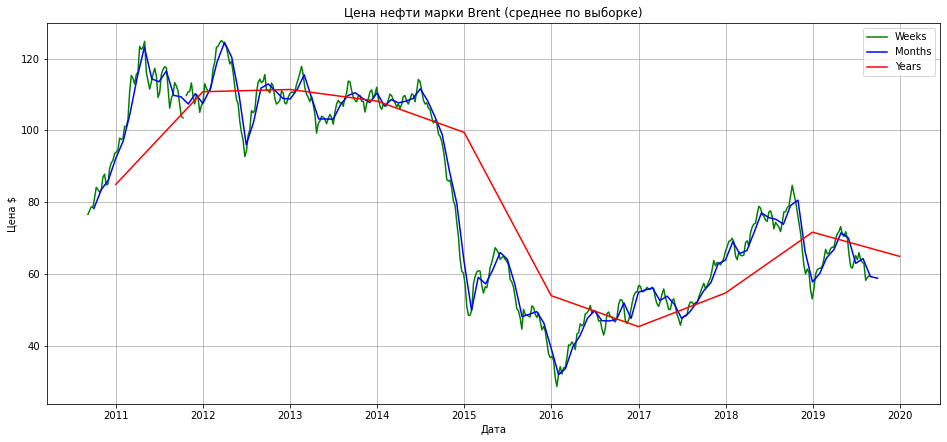

In [34]:
fig, ax = plt.subplots()
ax.plot(brent_week.index,  brent_week,  color="green", label="Weeks")
ax.plot(brent_month.index, brent_month, color="blue",  label="Months")
ax.plot(brent_year.index,  brent_year,  color="red",   label="Years")
plt.legend()
plt.title("Цена нефти марки Brent (среднее по выборке)")
plt.xlabel("Дата")
plt.ylabel("Цена $")
fig.set_figwidth(16)
fig.set_figheight(7)
plt.show()

In [35]:
# Перерасчёт стандартного отклонения по неделям
brent_week_std = brent.resample('W').std()
# Перерасчёт стандартного отклонения по месяцам
brent_month_std = brent.resample('M').std()
# Перерасчёт стандартного отклонения по годам
brent_year_std = brent.resample('Y').std()

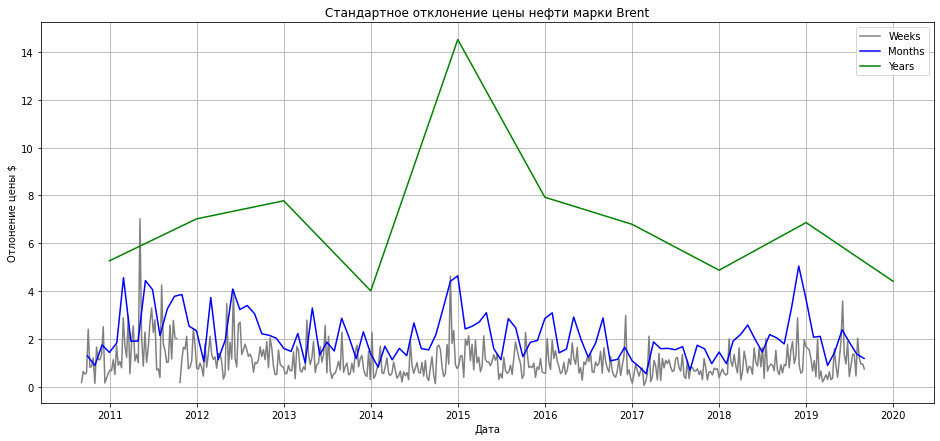

In [36]:
fig, ax = plt.subplots()
ax.plot(brent_week_std.index,  brent_week_std,  color="gray", label="Weeks")
ax.plot(brent_month_std.index, brent_month_std, color="blue", label="Months")
ax.plot(brent_year_std.index,  brent_year_std,  color="green",label="Years")
plt.legend()
plt.title("Стандартное отклонение цены нефти марки Brent")
plt.xlabel("Дата")
plt.ylabel("Отлонение цены $")
fig.set_figwidth(16)
fig.set_figheight(7)
plt.show()

Поведение цены на недельных и месячных графиках по сравнению с дневными, стало более плавным.
При увеличении периода измерений уменьшается частота и амплитуда колебаний средних значений.  
Стандартное отклонение, наоборот, растёт с ростом периода.